In [2]:
from data_loader.dataloader import get_data_loader
from models.vgg_model import VGGModel
from utils.config import process_config
from utils.dirs import create_dirs
from utils.utils import get_args
from keras.models import load_model
import cv2
from keras.preprocessing.image import ImageDataGenerator, img_to_array
import numpy as np
from sklearn import metrics
from IPython.display import Image
import os, random

In [4]:
configFile="configs/vgg_config.json"
config = process_config(configFile)


model = VGGModel(config)
model.load("/home/allparel/Allparel-ML/experiments/2018-07-13/vgg/checkpoints/vgg-56-0.76.hdf5")

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
vgg16 (Mod

In [5]:
generator = get_data_loader(config, False)
batch_size = config.trainer.batch_size
steps = config.trainer.validation_steps
probabilities = model.model.predict_generator(generator, steps, workers=6, use_multiprocessing=True, verbose=1)
val_preds = np.argmax(probabilities, axis=-1)

Found 26269 images belonging to 11 classes.
50/50 [==============================] - 38s 761ms/step


In [6]:
val_trues = [0] * batch_size * steps
generator = get_data_loader(config, False)
for i in range(steps):
    x = generator[i][1]
    for j in range(batch_size):
        val_trues[i * batch_size + j] = np.argmax(x[j], axis=-1)

Found 26269 images belonging to 11 classes.


In [7]:
labels = [""] * len(generator.class_indices)
for label, index in generator.class_indices.items():
    labels[index] = label

In [8]:
cm = metrics.confusion_matrix(val_trues, val_preds)
print(labels)
print(cm)
print(metrics.classification_report(val_trues, val_preds))
#print(probabilities)

['boatneck', 'collar', 'crewneck', 'deepv', 'highneck', 'offtheshoulder', 'scoopneck', 'splitneck', 'sweetheartneck', 'turtleneck', 'vneck']
[[   9    7   46    0    0    5    2    0    0    0    5]
 [   1 3416  268    1   20   11   24    1    1   14   91]
 [  11  471 2164    1   28   14  164    3    1    6   65]
 [   0   10    8   12    0    2    0    0    0    0   53]
 [   0   77   63    0   36    3    5    0    0    5   16]
 [   4   19   36    1    2  252   15    0    3    0   20]
 [   1   39  147    0    6   12  386    0    1    0   48]
 [   1   14    6    0    0    0    1    3    0    0   13]
 [   0    0    4    1    0    4    8    0   20    0    4]
 [   0   79   12    0    2    1    2    0    0   93    5]
 [   3  197  182   10    3    9   82    1   14    3  691]]
             precision    recall  f1-score   support

          0       0.30      0.12      0.17        74
          1       0.79      0.89      0.84      3848
          2       0.74      0.74      0.74      2928
       

/home/allparel/Allparel-ML/datasets/validation/neck/sweetheartneck/theia-womens-silk-pleated-cap-sleeve-gown.jpg


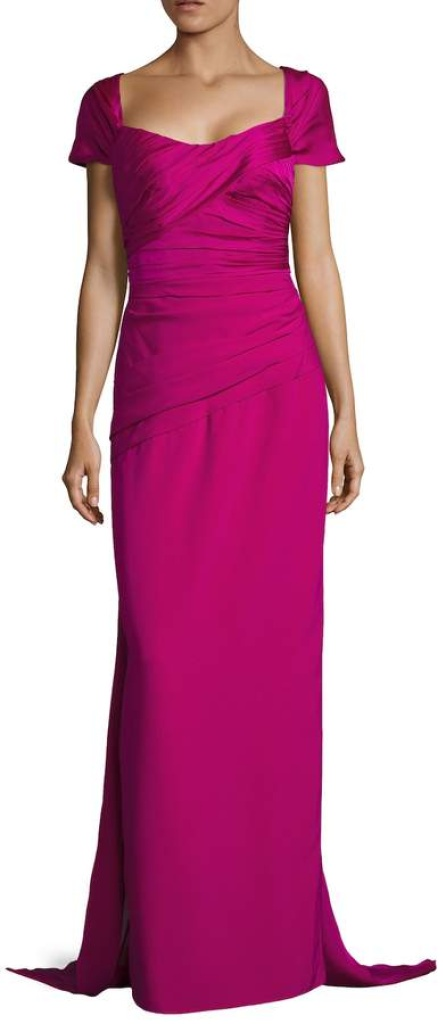

In [9]:
#filename = "sweetheart.jpg"
#filename = "/home/allparel/Allparel-ML/datasets/validation/neck/sweetheartneck/bardot-love-triangle-sweetheart-mini-lace-dress.jpg"
dir = "/home/allparel/Allparel-ML/datasets/validation/neck/sweetheartneck/"
filename = dir + random.choice(os.listdir(dir))
print(filename)
Image(filename, width=200)

In [10]:
X = np.empty((1, 224, 224, 3))
image = cv2.imread(filename)
image = cv2.resize(image, (224, 224))
image = img_to_array(image)
X[0,] = np.array(image, dtype="float") / 255.0
prediction = model.predict(X)
print(prediction)
cls = np.argmax(prediction, axis=-1)[0]
print("prediction: ", cls, " label: ", labels[cls])

[[0.02826206 0.10494798 0.26263016 0.02166273 0.0058703  0.16755927
  0.28065875 0.00069471 0.00567309 0.01424936 0.1077915 ]]
prediction:  6  label:  scoopneck
